In [ ]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

In [2]:
def read_numbers_from_file(file_name):
    with open(file_name, 'r') as file:
        arrays = file.read().split('\n')
        numbers = []
        for array in arrays[:-1]:
            array = array[1:-1]
            numbers.append([float(num) for num in array.split(',')])
        return numbers

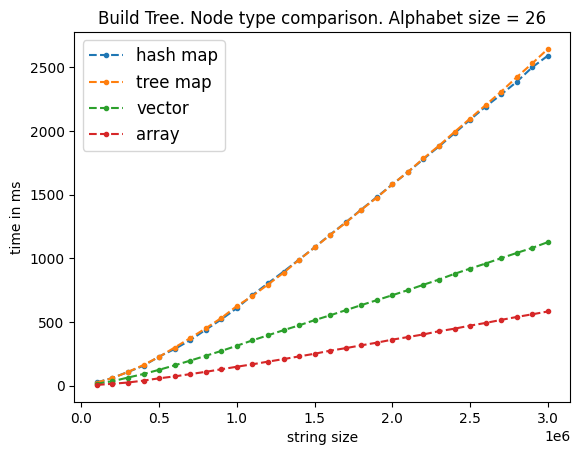

In [22]:
v = read_numbers_from_file("compare_node_type.txt")
plt.plot(v[0], v[1], '--.',label='hash map')
plt.plot(v[2], v[3], '--.', label='tree map')
plt.plot(v[4], v[5], '--.', label='vector')
plt.plot(v[6], v[7], '--.', label='array')
plt.xlabel(r'string size')
plt.ylabel(r'time in ms')
plt.legend(loc='best', fontsize=12)
plt.title('Build Tree. Node type comparison. Alphabet size = 26')
plt.show()

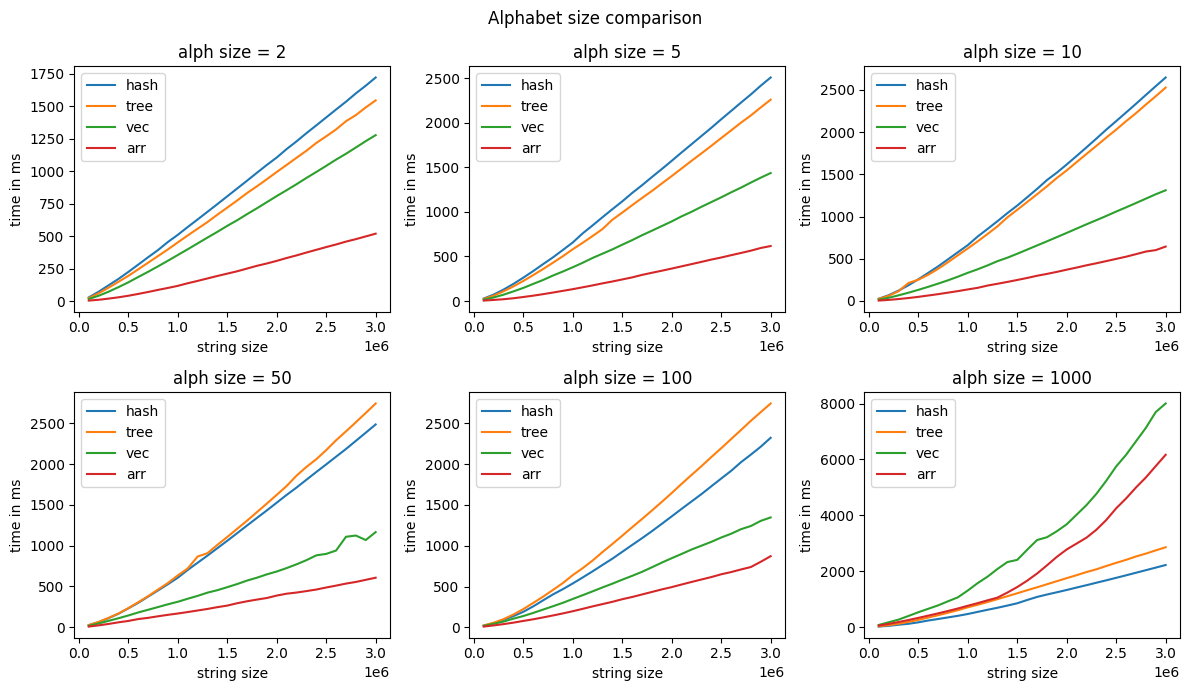

In [20]:
v = read_numbers_from_file("compare_alph_size.txt")

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 7), squeeze=False)

ptr = 0 
for i, alph_size in enumerate([2, 5, 10, 50, 100, 1000]):
    p = axes[i // 3][i % 3]   
    p.title.set_text("alph size = {}".format(alph_size))
    for struct in ["hash", "tree", "vec", "arr"]: 
        p.plot(v[ptr], v[ptr + 1],label=struct)
        p.set_xlabel("string size")
        p.set_ylabel("time in ms")
        ptr += 2
    p.legend() 

fig.suptitle("Alphabet size comparison")
fig.tight_layout()

plt.show()

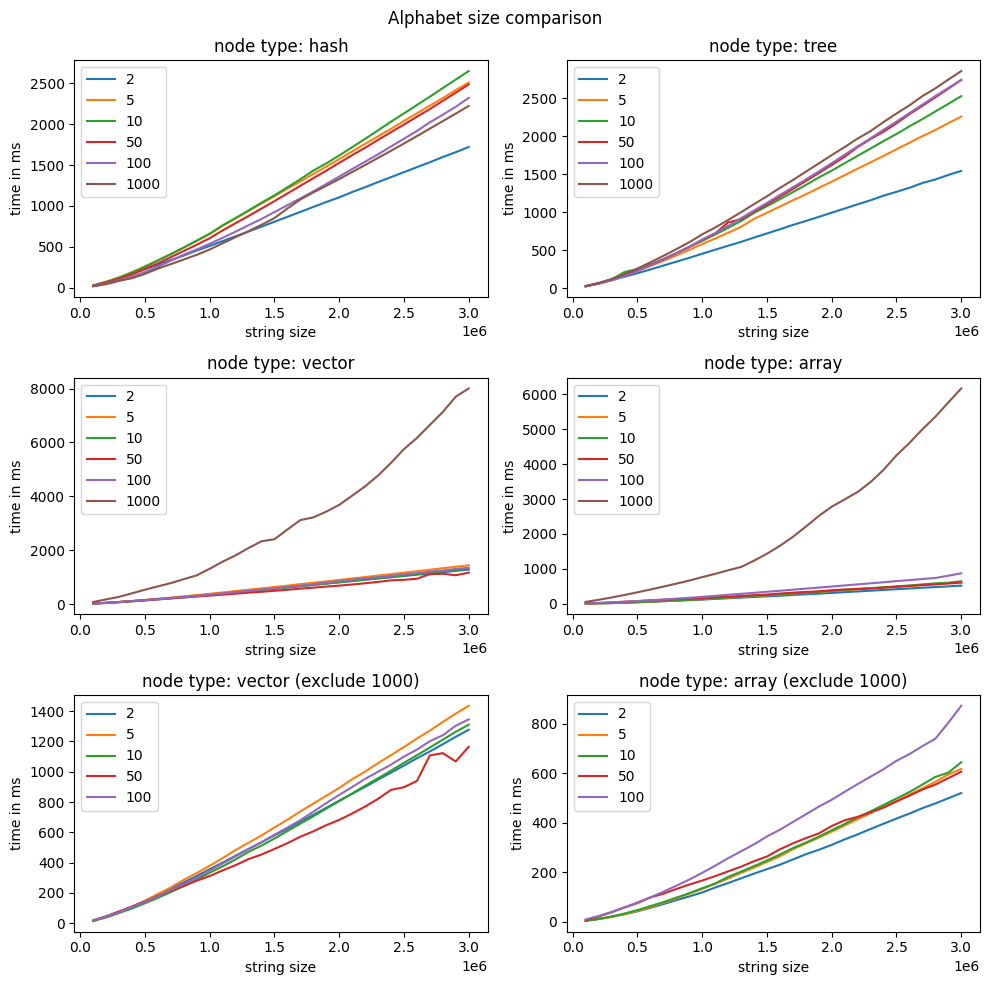

In [19]:
v = read_numbers_from_file("compare_alph_size.txt")

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 10), squeeze=False)

for i, struct in enumerate(["hash", "tree", "vector", "array"]): 
    p = axes[i // 2][i % 2]   
    p.title.set_text("node type: {}".format(struct))
    for j, alph_size in enumerate([2, 5, 10, 50, 100, 1000]):
        n = 8 * j + 2 * i
        p.plot(v[n], v[n + 1],label=alph_size)
        p.set_xlabel("string size")
        p.set_ylabel("time in ms")
    p.legend() 

for i, struct in enumerate(["vector", "array"], start=2): 
    p = axes[1 + i // 2][i % 2]   
    p.title.set_text("node type: {} (exclude 1000)".format(struct))
    p.set_xlabel("string size")
    p.set_ylabel("time in ms")
    for j, alph_size in enumerate([2, 5, 10, 50, 100]):
        n = 8 * j + 2 * i
        p.plot(v[n], v[n + 1],label=alph_size)
    p.legend() 

fig.suptitle("Alphabet size comparison")
fig.tight_layout()

plt.show()

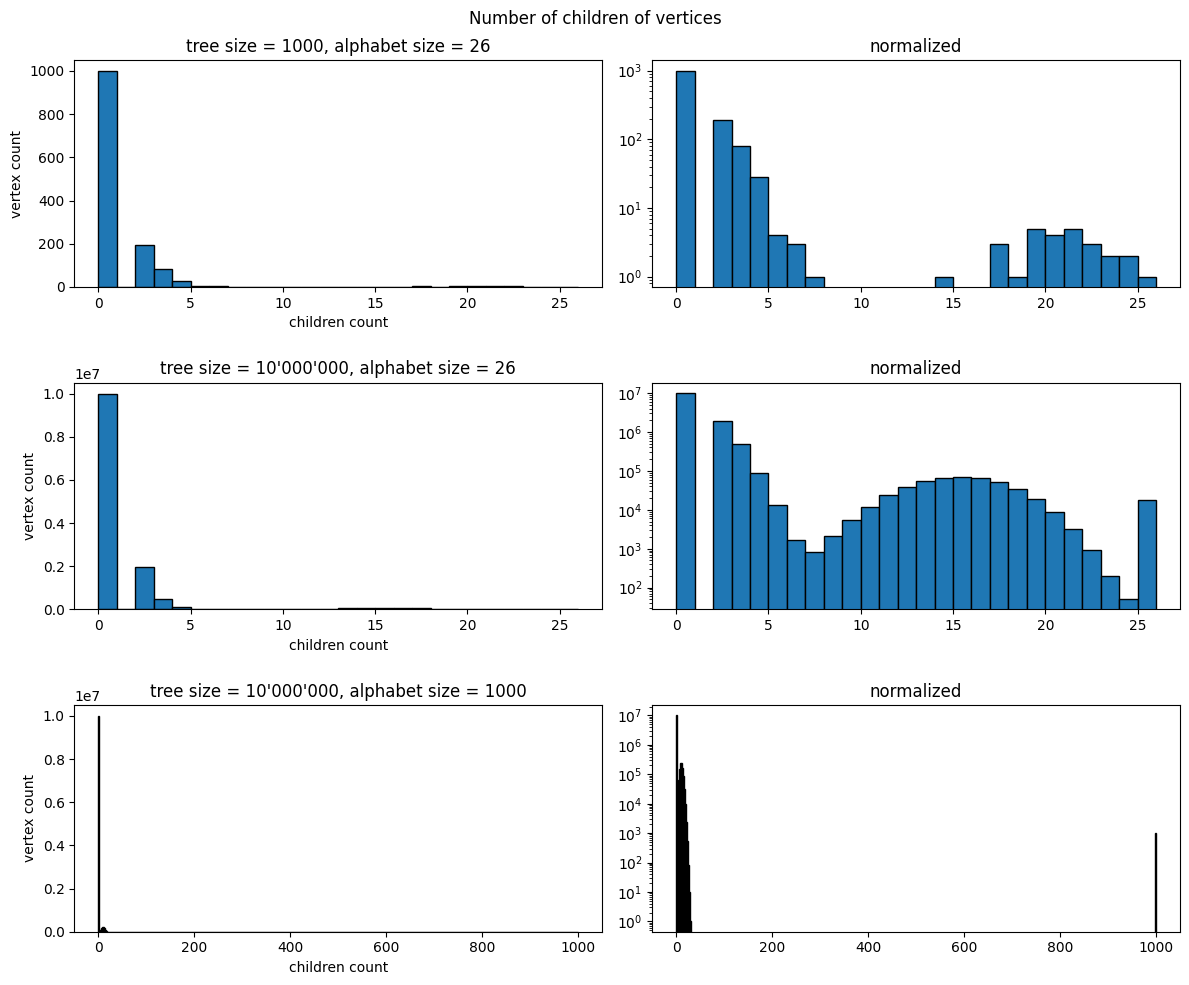

In [10]:
childs = read_numbers_from_file("childs.txt")

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12, 10), squeeze=False)

for i, size in enumerate(["1000", "10'000'000"]):
    p = axes[i]
    p[0].hist(childs[i], log=False, edgecolor = 'black', bins = 26)
    p[1].hist(childs[i], log=True, edgecolor = 'black', bins = 26)
    p[0].set_xlabel("children count")
    p[0].set_ylabel("vertex count")
    p[0].title.set_text("tree size = {}, alphabet size = 26".format(size))
    p[1].title.set_text("normalized")

p = axes[2]
p[0].hist(childs[2], log=False, edgecolor = 'black', bins = 500)
p[1].hist(childs[2], log=True, edgecolor = 'black', bins = 500)
p[0].set_xlabel("children count")
p[0].set_ylabel("vertex count")
p[0].title.set_text("tree size = {}, alphabet size = 1000".format(size))
p[1].title.set_text("normalized")

fig.suptitle("Number of children of vertices")
fig.tight_layout()
plt.show()

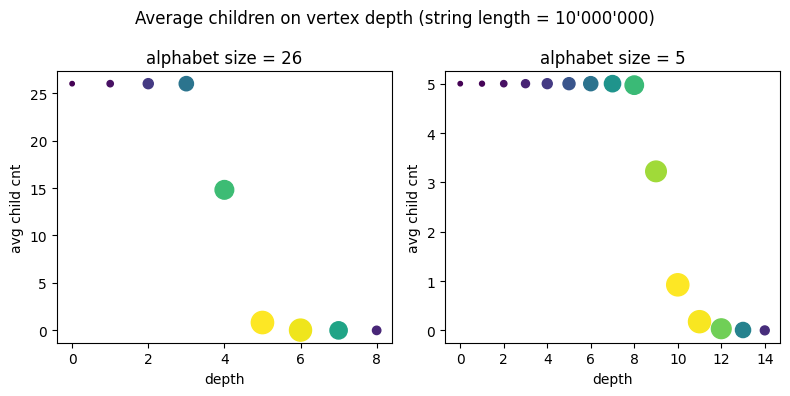

In [11]:
import math 

v = read_numbers_from_file("childs_depth.txt")

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), squeeze=False)

for i, alph_size in enumerate(["26", "5"]):
    p = axes[0][i]
    size = v[3 * i + 1]
    size = [10 + math.log(i)**2 for i in size]
    p.scatter(v[3 * i], v[3 * i + 2], s=size, c=size)
    p.set_xlabel("depth")
    p.set_ylabel("avg child cnt")
    p.title.set_text("alphabet size = {}".format(alph_size))

fig.suptitle("Average children on vertex depth (string length = 10'000'000)")
fig.tight_layout()
plt.show()